In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
import matplotlib as mpl

In [58]:
# Read file with brackish availablility which meets criteria
bw_df = pd.read_csv('/Users/mhardika/Documents/AMO/GeoToolAll_Methods/Water Source Data/Brackish/brackish_sites_baseline_dwi_5Feb23.csv')
# State abbreviation and code to map all relevant files
state_code = pd.read_csv(r'\Users\mhardika\Documents\AMO\2050\analysis_files\state_geocode.csv')
# State shape file
us_states = gp.read_file(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files\tl_rd22_us_state\tl_rd22_us_state.shp')
# freshwater demand
pp_demand = pd.read_csv(r'\Users\mhardika\Documents\AMO\Analysis Data Files\Power\power_plant_combined_demand.csv')

# Contiguous states
state_codes = ['AL','AZ','AR','CA','CO','CT','FL','GA','ID','IL','IN',
               'IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO',
               'MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH',
               'OK','OR','PA','RI','SC','SD','TN','TX','UT','VA','VT','WA',
               'WV','WI','WY']
 

In [7]:
# Function to plot contiguous states and demand/availability

def plot_map(df, title, ydata = 'demand',scale = 'norm', units='m3/s'):
    geodf = gp.GeoDataFrame(df,crs="EPSG:4326", geometry=df['geometry'])

    # Creating scale for colorbar

    vmin,vmax = geodf[ydata].min(), geodf[ydata].max()

    if scale == 'log' and vmin == 0:
        vmin = 1e-2
            
    colormap = 'winter'
    # add color scale
    if scale == 'log':
        norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
    else: 
        norm = plt.Normalize(vmin=vmin, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=colormap, norm = norm)

    # Create figure
    fig, ax = plt.subplots(figsize=(7,5))
    ax.axis('off')

    # Set title
    ax.set_title(title,fontdict={'fontsize': '20', 'fontweight' : '1'})

    # Create colorbar legend
    fig = ax.get_figure()
    cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])  
    cbax.set_title(units)
        
    geodf.plot(ax = ax , column = geodf[ydata], edgecolor='black',cmap=colormap, norm = norm)
    fig.colorbar(sm, cax=cbax)
    # sm.set_clim(-100,100)

In [8]:
# Function to make bar plot of states and demand/availability

def plot_bar(df, title, ydata = 'demand', ydata2=None, ydata3 = None, scale = 'norm', ydata_units='m3/s',ydata3_units = None):

    fig, ax = plt.subplots(figsize=(15,8))
    x = np.array(range(0,len(df['state_alpha'])))
    print(x)
    # Water Demand
    ax.bar(x,df[ydata],width = 0.35, color = 'cornflowerblue',label=ydata)
    ax.legend()
    ticklabels = np.concatenate(([' '],df['state_alpha'],[' ']))
    ax.set_xticklabels(ticklabels)
    ax.set_xlim([-1,47])
    ax.xaxis.set_major_locator(plt.MaxNLocator(len(df['state_alpha'])+1))

    if scale == 'log':
        ax.set_yscale('log')
    else:
        ax.set_ylim([0,df[ydata].max()+1])

    if ydata2 != None:
        ax.bar(x,df[ydata2],bottom=df[ydata],width = 0.35, color = 'firebrick',label=ydata2)
        ax.set_ylim([0,max(df[ydata2]+df[ydata])+1])
    
    if ydata2 != None:
        ax0 = ax.twinx()
        ax0.scatter(x,ydata3,c='black')
        # ax0.set_ylim([0,max(ydata3)+10])
        ax0.set_yscale('log')
        ax0.set_ylabel(ydata3_units)
    # ax.yaxis.set_ticks_position('both')
    # ax.tick_params(labelleft=True, labelright=True)
    ax.set_ylabel(ydata_units)
    ax.set_title(title,fontdict={'fontsize': '20', 'fontweight' : '1'})
    ax.legend()

ME
RI
VT


c:\Users\mhardika\miniconda3\envs\watertap3\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
c:\Users\mhardika\miniconda3\envs\watertap3\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  result[:] = values


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


C:\Users\mhardika\AppData\Local\Temp\1\ipykernel_20240\4207138316.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticklabels)


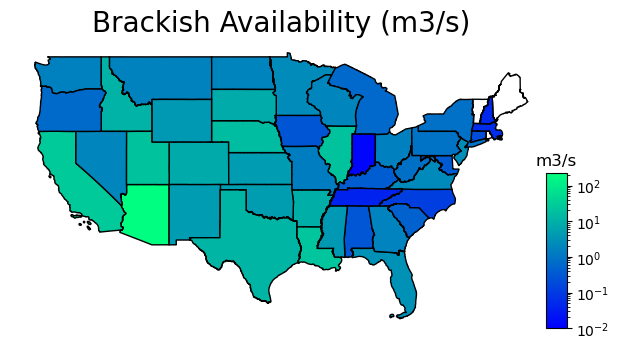

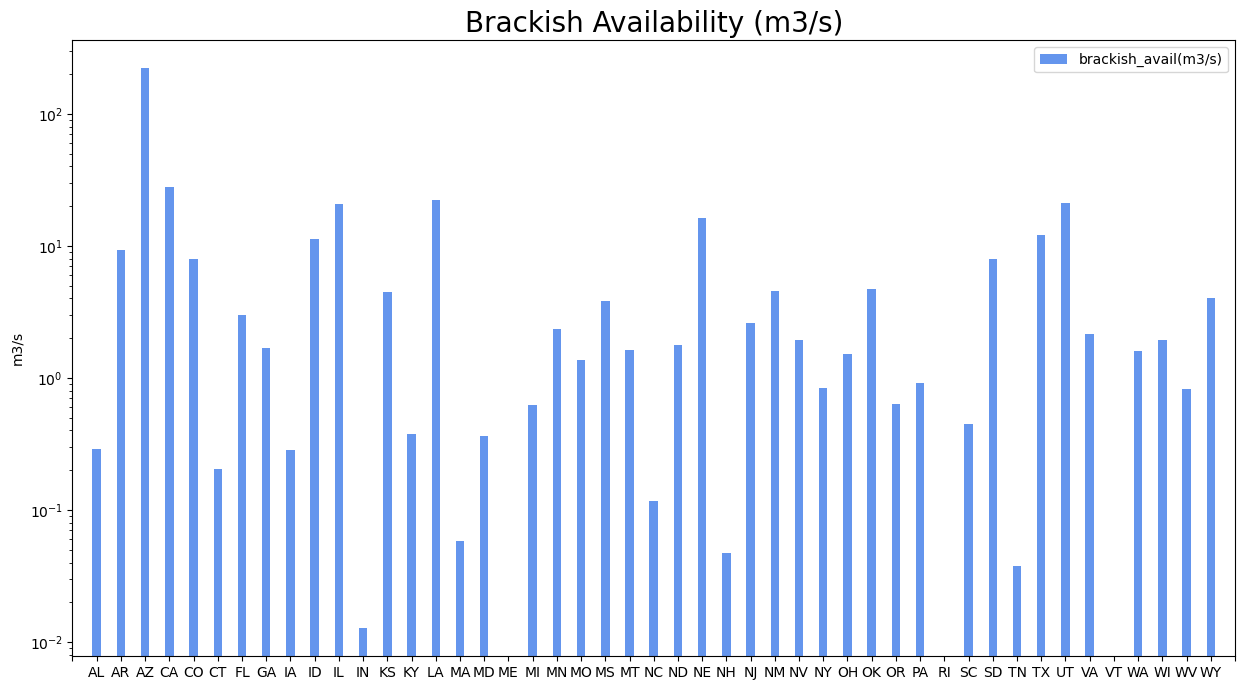

In [41]:
# Brackish availability map and fresh water demand across the states
cols = ['state_alpha','brackish_avail(m3/s)', 'geometry' ]
bw_state_df = pd.DataFrame(columns=cols)

state_alpha_list = []
brackish_avail_list = []
geometry_list = []

for state_alpha in state_codes:
    state = bw_df[bw_df['state_alpha']==state_alpha].copy()
    if len(state)==0:
        print(state_alpha)
    # print(state['well_yield'].sum())
    state_alpha_list.append(state_alpha)
    brackish_avail_list.append(state['well_yield'].sum())
    geometry_list.append(us_states[us_states['STUSPS']==state_alpha]['geometry'].values[0])
    

bw_state_df['state_alpha'] = state_alpha_list
bw_state_df['brackish_avail(m3/s)'] = brackish_avail_list
bw_state_df['geometry' ] = geometry_list
bw_state_df = bw_state_df.sort_values('state_alpha')

plot_map(bw_state_df, "Brackish Availability (m3/s)", ydata = 'brackish_avail(m3/s)', scale = 'log')
plot_bar(bw_state_df, "Brackish Availability (m3/s)", ydata = 'brackish_avail(m3/s)', scale = 'log')

In [10]:
# Calculate average LCOW in each state without clustering

cols = ['state_alpha','LCOW($/m3)', 'geometry' ]
unclustered_lcow_state_df = pd.DataFrame(columns=cols)

state_alpha_list = []
unclustered_lcow_list = []
unclustered_pipe_list = []
geometry_list = []

for state_alpha in state_codes:
    state = bw_df[bw_df['state_alpha']==state_alpha].copy()
    if len(state)==0:
        print(state_alpha)

    # Calculate cummulative LCOW
    state['lcow_treatment_well'] = state['treatment_lcow'] + state['well_field_lcow']/(state['recovery']/100)
    state_sorted = state.sort_values('lcow_treatment_well')

    # Calculating LCOW as a function of well yield without clustering
    flow = state_sorted['well_yield']*state_sorted['recovery']/100
    cum_flow_1 = flow.cumsum()

    # Treatment cost included in lcow 
    lcow_treatment = state_sorted['lcow_treatment_well'] 
    cost_treatment = lcow_treatment*flow
    cum_cost_1 = cost_treatment.cumsum()

    # Transport cost
    lcow_transport = state_sorted['pipe_lcow']
    cost_treatment = lcow_transport*flow
    cum_cost_2 = cost_treatment.cumsum()    

    avg_treatment_lcow = np.divide(cum_cost_1, cum_flow_1, out=np.zeros_like(cum_cost_1), where=cum_flow_1!=0) 
    avg_transport_lcow = np.divide(cum_cost_2, cum_flow_1, out=np.zeros_like(cum_cost_2), where=cum_flow_1!=0) 
    state_alpha_list.append(state_alpha)
    try:
        unclustered_lcow_list.append(avg_treatment_lcow.values[-1])
        unclustered_pipe_list.append(avg_transport_lcow.values[-1])
    except:
        unclustered_lcow_list.append(0)
        unclustered_pipe_list.append(0)
    geometry_list.append(us_states[us_states['STUSPS']==state_alpha]['geometry'].values[0])
    

unclustered_lcow_state_df['state_alpha'] = state_alpha_list
unclustered_lcow_state_df['Treatment + Disposal LCOW($/m3)'] = unclustered_lcow_list
unclustered_lcow_state_df['Brine Transport LCOW($/m3)'] = unclustered_pipe_list
unclustered_lcow_state_df['geometry' ] = geometry_list
unclustered_lcow_state_df = unclustered_lcow_state_df.sort_values('state_alpha')

# unclustered_lcow_state_df.head(2)


ME
RI
VT


c:\Users\mhardika\miniconda3\envs\watertap3\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
c:\Users\mhardika\miniconda3\envs\watertap3\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  result[:] = values


In [42]:
# plot_map(unclustered_lcow_state_df, "Unclustered Average LCOW($/m3)", ydata = 'LCOW($/m3)', scale = 'norm', units ='$/m3')
# plot_bar(unclustered_lcow_state_df, "Unclustered Average LCOW($/m3)", ydata = 'Treatment + Disposal LCOW($/m3)',
#          ydata2 ='Brine Transport LCOW($/m3)',ydata3= bw_state_df['brackish_avail(m3/s)'],scale = 'norm', ydata_units ='LCOW $/m3',ydata3_units='Brackish Availability (m3/s)')

In [11]:
# Calculate average LCOW in each state with clustering

cols = ['state_alpha', 'geometry' ]
clustered_lcow_state_df = pd.DataFrame(columns=cols)

state_alpha_list = []
cluster_lcow_list = []
clustered_treatment_lcow_list = []
clustered_subcluster_transport_lcow_list = []
clustered_cluster_transport_lcow_list = []
clustered_brine_transport_lcow_list = []
geometry_list = []

for state_alpha in state_codes:
    state = bw_df[bw_df['state_alpha']==state_alpha].copy()
    if len(state)==0:
        print(state_alpha)

    # Read cluster results file
    try:
        PATH = r'\Users\mhardika\Documents\AMO\Analysis Data Files\clustering_results\\' + state_alpha
        condensed_cluster_bw_df = pd.read_csv(PATH + '\\' + state_alpha.lower()+'_cluster.csv')
        condensed_cluster_bw_df_sort = condensed_cluster_bw_df.sort_values(by=['cluster_lcow'])
        flow = condensed_cluster_bw_df_sort['cluster_total_well_yield']*condensed_cluster_bw_df_sort['recovery']/100
        cum_flow = flow.cumsum()

        # Pipe from well to subcluster
        well_subcluster_cost = condensed_cluster_bw_df_sort['cluster_avg_pipe_well_subcluster_lcow']*flow
        cum_well_subcluster_cost = well_subcluster_cost.cumsum()

        # Pipe from subcluster to cluster
        subcluster_cluster_cost = condensed_cluster_bw_df_sort['cluster_avg_pipe_subcluster_cluster_lcow']*flow
        cum_subcluster_cluster_cost = subcluster_cluster_cost.cumsum()

        # Treatment + well field + deep well injection
        treatment_cost = (condensed_cluster_bw_df_sort['cluster_avg_well_field_lcow'] + condensed_cluster_bw_df_sort['treatment_lcow'])*flow
        cum_treatment_cost = treatment_cost.cumsum()

        # Brine
        brine_transport_cost = condensed_cluster_bw_df_sort['cluster_pipe_brine_lcow']*flow
        cum_brine_transport_cost = brine_transport_cost.cumsum()

        # Total LCOW to verify
        cluster_cost = condensed_cluster_bw_df_sort['cluster_lcow']*flow
        # cluster_cost = (condensed_cluster_bw_df_sort['cluster_avg_pipe_well_subcluster_lcow'] +
        #                 condensed_cluster_bw_df_sort['cluster_avg_pipe_subcluster_cluster_lcow']+
        #                 condensed_cluster_bw_df_sort['cluster_pipe_brine_lcow'] +
        #                 condensed_cluster_bw_df_sort['cluster_avg_well_field_lcow'] + condensed_cluster_bw_df_sort['treatment_lcow'])*flow
        cum_cluster_cost = cluster_cost.cumsum()

        avg_well_subcluster_lcow = np.divide(cum_well_subcluster_cost, cum_flow)
        avg_subcluster_cluster_lcow = np.divide(cum_subcluster_cluster_cost, cum_flow)
        avg_treatment_lcow = np.divide(cum_treatment_cost, cum_flow)
        avg_brine_transport_lcow = np.divide(cum_brine_transport_cost, cum_flow)
        avg_cluster_lcow = np.divide(cum_cluster_cost, cum_flow)

    except:
        avg_treatment_lcow =  unclustered_lcow_state_df[unclustered_lcow_state_df['state_alpha']==state_alpha]['Treatment + Disposal LCOW($/m3)'].values[0]
        avg_brine_transport_lcow = unclustered_lcow_state_df[unclustered_lcow_state_df['state_alpha']==state_alpha]['Brine Transport LCOW($/m3)'].values[0]
        avg_well_subcluster_lcow = 0
        avg_subcluster_cluster_lcow = 0
        avg_cluster_lcow = avg_treatment_lcow + avg_brine_transport_lcow

    state_alpha_list.append(state_alpha)

    try:
        clustered_treatment_lcow_list.append(avg_treatment_lcow.values[-1])
        clustered_subcluster_transport_lcow_list.append(avg_well_subcluster_lcow.values[-1])
        clustered_cluster_transport_lcow_list.append(avg_subcluster_cluster_lcow.values[-1])
        clustered_brine_transport_lcow_list.append(avg_brine_transport_lcow.values[-1])
        cluster_lcow_list.append(avg_cluster_lcow.values[-1])

    except:
        clustered_treatment_lcow_list.append(avg_treatment_lcow)
        clustered_subcluster_transport_lcow_list.append(avg_well_subcluster_lcow)
        clustered_cluster_transport_lcow_list.append(avg_subcluster_cluster_lcow)
        clustered_brine_transport_lcow_list.append(avg_brine_transport_lcow)
        cluster_lcow_list.append(avg_cluster_lcow)

    geometry_list.append(us_states[us_states['STUSPS']==state_alpha]['geometry'].values[0])
    

clustered_lcow_state_df['state_alpha'] = state_alpha_list
clustered_lcow_state_df['Treatment + Disposal LCOW($/m3)'] = clustered_treatment_lcow_list
clustered_lcow_state_df['Well Subcluster Transport LCOW($/m3)'] = clustered_subcluster_transport_lcow_list
clustered_lcow_state_df['Cluster Transport LCOW($/m3)'] = clustered_cluster_transport_lcow_list
clustered_lcow_state_df['Brine Transport LCOW($/m3)'] = clustered_brine_transport_lcow_list
clustered_lcow_state_df['Cluster LCOW($/m3)'] = cluster_lcow_list

clustered_lcow_state_df['geometry' ] = geometry_list
clustered_lcow_state_df = clustered_lcow_state_df.sort_values('state_alpha')

clustered_lcow_state_df.head(2)

ME
RI
VT


c:\Users\mhardika\miniconda3\envs\watertap3\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
c:\Users\mhardika\miniconda3\envs\watertap3\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  result[:] = values


,state_alpha,geometry,Treatment + Disposal LCOW($/m3),Well Subcluster Transport LCOW($/m3),Cluster Transport LCOW($/m3),Brine Transport LCOW($/m3),Cluster LCOW($/m3)
0,AL,"POLYGON ((-88.139988 34.581703, -88.1399689999...",0.776086,0.000000,0.630472,0.185956,1.592515
2,AR,"POLYGON ((-94.552172 36.102128, -94.552499 36....",0.554870,0.232066,0.111580,0.021861,0.920377


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


C:\Users\mhardika\AppData\Local\Temp\1\ipykernel_1296\2257269310.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticklabels)


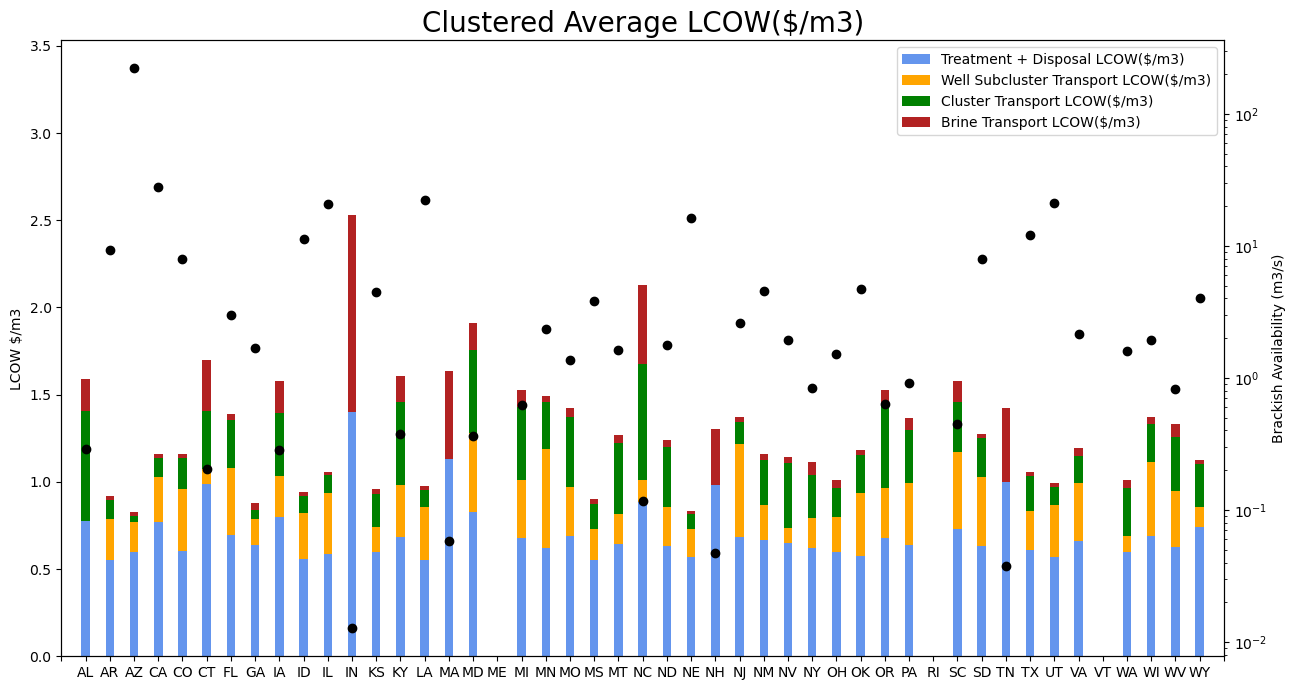

In [9]:
# plot_map(clustered_lcow_state_df, "Clustered Average LCOW($/m3)", ydata = 'LCOW($/m3)', scale = 'norm', units ='$/m3')

df = clustered_lcow_state_df
title = "Clustered Average LCOW($/m3)"
ydata = 'Treatment + Disposal LCOW($/m3)'
scale = 'norm'
units = 'LCOW $/m3'

ydata1 = 'Well Subcluster Transport LCOW($/m3)'
ydata2 = 'Cluster Transport LCOW($/m3)'
ydata3 = 'Brine Transport LCOW($/m3)'


fig, ax = plt.subplots(figsize=(15,8))
x = np.array(range(0,len(df['state_alpha'])))
print(x)
# Treatment + disposal
ax.bar(x,df[ydata],width = 0.35, color = 'cornflowerblue',label=ydata)

ax.legend()
ticklabels = np.concatenate(([' '],df['state_alpha'],[' ']))
ax.set_xticklabels(ticklabels)
ax.set_xlim([-1,47])
ax.xaxis.set_major_locator(plt.MaxNLocator(len(df['state_alpha'])+1))

if scale == 'log':
    ax.set_yscale('log')
else:
    ax.set_ylim([0,df[ydata].max()+1])

ax.bar(x,df[ydata1],bottom=df[ydata],width = 0.35, color = 'orange', label = ydata1)
ax.bar(x,df[ydata2],bottom=df[ydata]+df[ydata1],width = 0.35, color = 'green', label = ydata2)
ax.bar(x,df[ydata3],bottom=df[ydata]+df[ydata1]+df[ydata2],width = 0.35, color = 'firebrick',label = ydata3)
ax.set_ylim([0,max(df[ydata]+df[ydata1]+df[ydata2]+df[ydata3])+1])
# ax.bar(x+0.15,df['Cluster LCOW($/m3)'],width = 0.35, color = 'grey',label='Cluster')

ax0 = ax.twinx()
ax0.scatter(x,bw_state_df['brackish_avail(m3/s)'],c='black')

ax0.set_yscale('log')
ax0.set_ylabel('Brackish Availability (m3/s)')
# # ax.yaxis.set_ticks_position('both')
# # ax.tick_params(labelleft=True, labelright=True)
ax.set_ylabel(units)
ax.set_title(title,fontdict={'fontsize': '20', 'fontweight' : '1'})
ax.legend()

C:\Users\mhardika\AppData\Local\Temp\1\ipykernel_20240\2915225302.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticklabels)


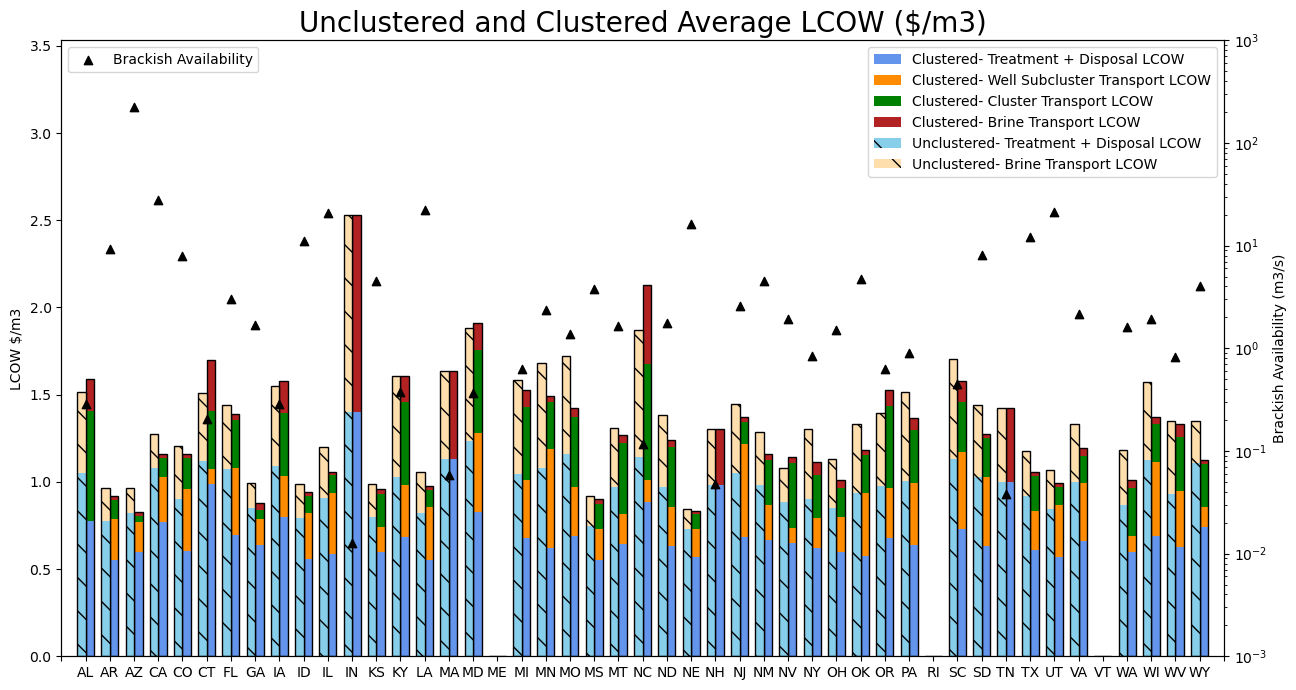

In [12]:
# Unclustered and clustered LCOW combined
df = clustered_lcow_state_df
df2 = unclustered_lcow_state_df

title = "Unclustered and Clustered Average LCOW ($/m3)"
ydata = 'Treatment + Disposal LCOW($/m3)'
scale = 'norm'
units = 'LCOW $/m3'

ydata1 = 'Well Subcluster Transport LCOW($/m3)'
ydata2 = 'Cluster Transport LCOW($/m3)'
ydata3 = 'Brine Transport LCOW($/m3)'
ydata4 = 'Cluster LCOW($/m3)'

fig, ax = plt.subplots(figsize=(15,8))
x = np.array(range(0,len(df['state_alpha'])))
w =0.35

# Clustered
# Treatment + disposal
ax.bar(x+w/2,df[ydata],width = w, color = 'cornflowerblue',label='Clustered- '+ ydata[:-6])
ax.bar(x+w/2,df[ydata1],bottom=df[ydata],width = w, color = 'darkorange', label ='Clustered- '+ ydata1[:-6])
ax.bar(x+w/2,df[ydata2],bottom=df[ydata]+df[ydata1],width = w, color = 'green', label = 'Clustered- '+ ydata2[:-6])
ax.bar(x+w/2,df[ydata3],bottom=df[ydata]+df[ydata1]+df[ydata2],width = w, color = 'firebrick',label ='Clustered- '+ ydata3[:-6])
ax.set_ylim([0,max(df[ydata]+df[ydata1]+df[ydata2]+df[ydata3])+1])
ax.bar(x+w/2,df['Cluster LCOW($/m3)'],width = w, color = 'grey',edgecolor='black',fill=None)

ax.set_ylim([0,max(df[ydata4].max(),df2[ydata].max())+1])

# Unclustered
ax.bar(x-w/2,df2[ydata],width = w, color = 'skyblue',label='Unclustered- '+ydata[:-6],hatch='\\')
ax.bar(x-w/2,df2[ydata3],bottom=df2[ydata],width = w, color = 'navajowhite',label = 'Unclustered- '+ydata3[:-6],hatch='\\')
ax.bar(x-w/2,df2[ydata]+df2[ydata3],width = w,edgecolor='black',fill=None)

ax0 = ax.twinx()
ax0.scatter(x,bw_state_df['brackish_avail(m3/s)'],marker='^',c='black',label = 'Brackish Availability')

ax.legend()
ticklabels = np.concatenate(([' '],df['state_alpha'],[' ']))
ax.set_xticklabels(ticklabels)
ax.set_xlim([-1,47])
ax.xaxis.set_major_locator(plt.MaxNLocator(len(df['state_alpha'])+1))

ax0.set_yscale('log')
ax0.set_ylim([0.001,1000])
ax0.set_ylabel('Brackish Availability (m3/s)')
ax.set_ylabel(units)
ax.set_title(title,fontdict={'fontsize': '20', 'fontweight' : '1'})
ax.legend()
ax0.legend(loc='upper left')

C:\Users\mhardika\AppData\Local\Temp\1\ipykernel_1296\2629184489.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticklabels)


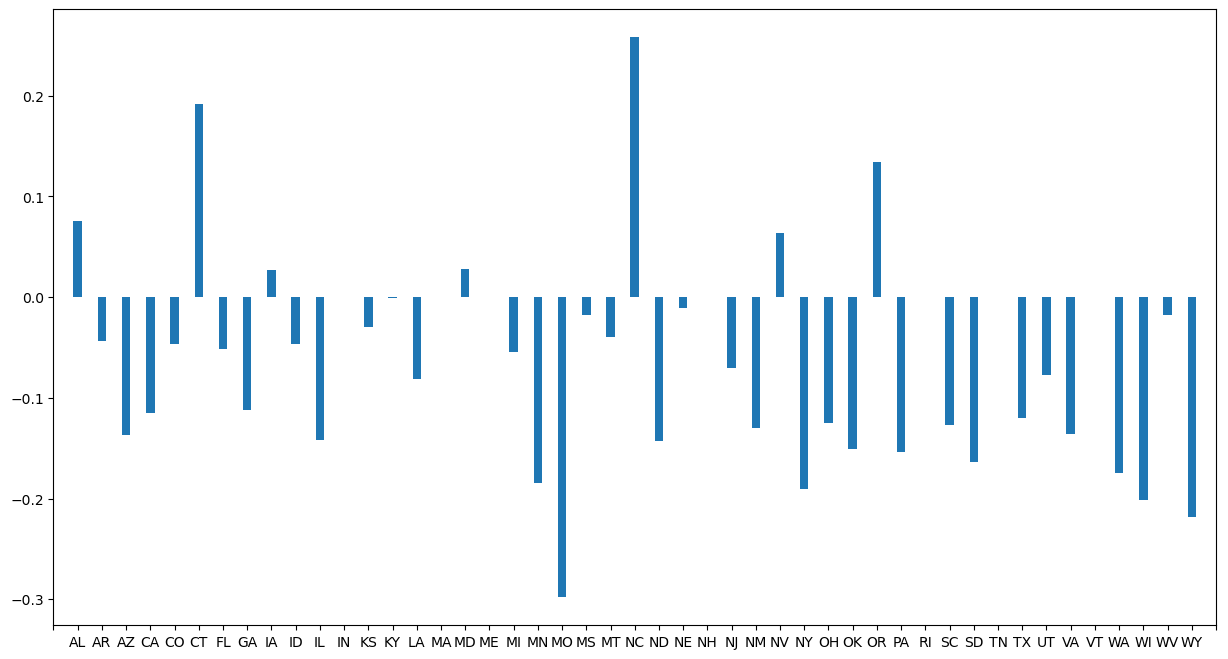

In [44]:
lcow_diff_df= clustered_lcow_state_df
lcow_diff_df['LCOW($/m3)'] =clustered_lcow_state_df['Cluster LCOW($/m3)']-unclustered_lcow_state_df['Treatment + Disposal LCOW($/m3)']  - unclustered_lcow_state_df['Brine Transport LCOW($/m3)']
# plot_bar(lcow_diff_df, "Change LCOW($/m3)", ydata = 'LCOW($/m3)', scale = 'norm', ydata_units ='LCOW $/m3')
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x,lcow_diff_df['LCOW($/m3)'],width=0.35)
ticklabels = np.concatenate(([' '],df['state_alpha'],[' ']))
ax.set_xticklabels(ticklabels)
ax.set_xlim([-1,47])
ax.xaxis.set_major_locator(plt.MaxNLocator(len(df['state_alpha'])+1))
# ax.set_ylim([-3.5,3.5])


c:\Users\mhardika\miniconda3\envs\watertap3\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
c:\Users\mhardika\miniconda3\envs\watertap3\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  result[:] = values


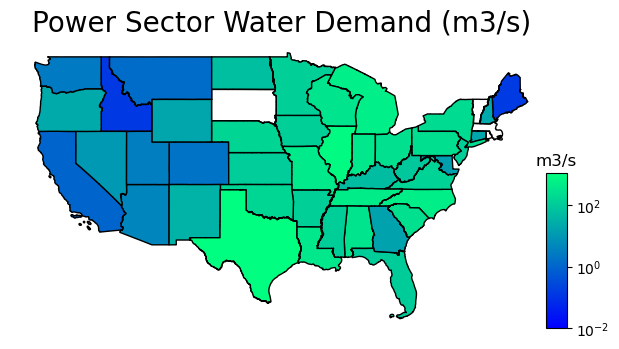

In [59]:
# Powerplant demand map

# Plot USA map
cols = ['state_alpha','fresh_demand(m3/s)', 'geometry' ]
pp_state_df = pd.DataFrame(columns=cols)

state_alpha_list = []
pp_demand_list = []
geometry_list = []

for state_alpha in state_codes:
    state = pp_demand[pp_demand['PlantState']==state_alpha].copy()
    # print(state['well_yield'].sum())
    state_alpha_list.append(state_alpha)
    pp_demand_list.append(state['Demand_m3/s'].sum())
    geometry_list.append(us_states[us_states['STUSPS']==state_alpha]['geometry'].values[0])
    

pp_state_df['state_alpha'] = state_alpha_list
pp_state_df['fresh_demand(m3/s)'] = pp_demand_list
pp_state_df['geometry' ] = geometry_list
pp_state_df = pp_state_df.sort_values('state_alpha')

plot_map(pp_state_df, "Power Sector Water Demand (m3/s)", ydata = 'fresh_demand(m3/s)', scale = 'log')
# plot_bar(pp_state_df, "Power Demand (m3/s)", ydata = 'fresh_demand(m3/s)', scale = 'norm')

C:\Users\mhardika\AppData\Local\Temp\1\ipykernel_20240\1400798672.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticklabels)
C:\Users\mhardika\AppData\Local\Temp\1\ipykernel_20240\1400798672.py:29: RuntimeWarning: divide by zero encountered in true_divide
  demand_frac_met = np.divide(brackish_avail_list,pp_demand_list)
C:\Users\mhardika\AppData\Local\Temp\1\ipykernel_20240\1400798672.py:29: RuntimeWarning: invalid value encountered in true_divide
  demand_frac_met = np.divide(brackish_avail_list,pp_demand_list)


47


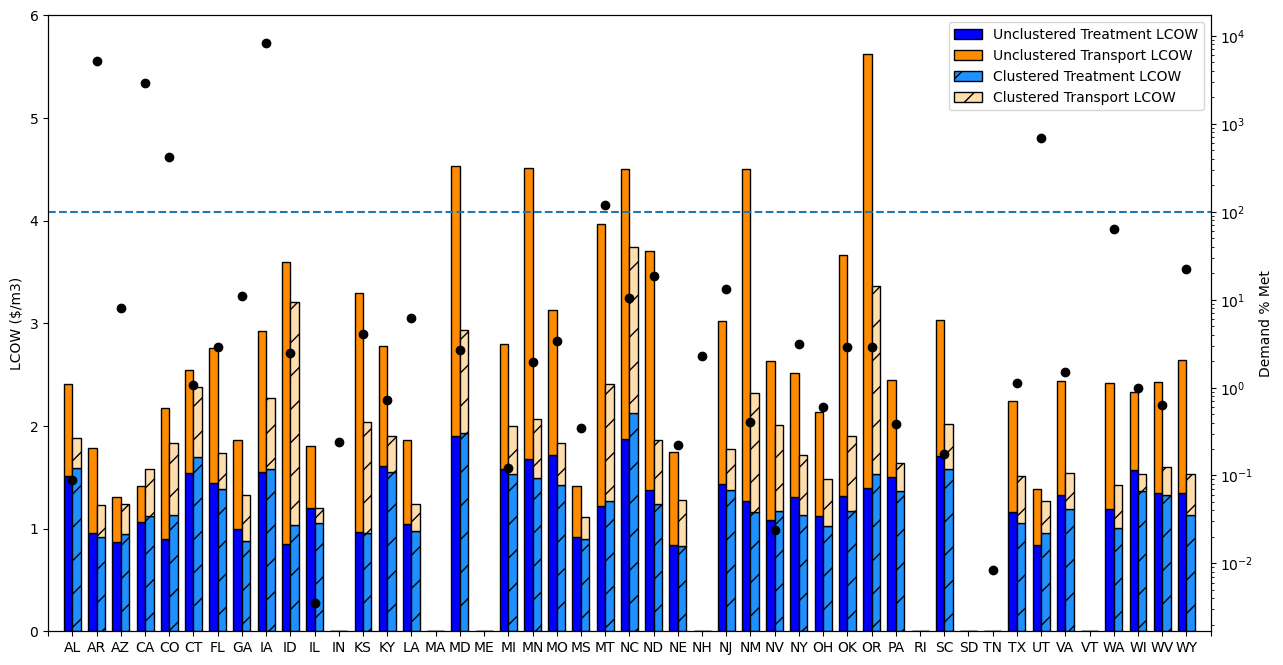

In [15]:
# Plot power plant economy of scale for unclustered and clustered combined

pp_economy_of_scale_df = pd.read_excel(r'\Users\mhardika\Documents\AMO\Analysis Data Files\Power\pp_economy_of_scale_v2.xlsx')
pp_economy_of_scale_df = pp_economy_of_scale_df.fillna(0)
# pp_economy_of_scale_df.head(10)
pp_economy_of_scale_df = pp_economy_of_scale_df.sort_values('state_alpha')

fig, ax = plt.subplots(figsize=(15,8))
x = np.array(range(0,len(pp_economy_of_scale_df['state_alpha'])))
ax.bar(x-0.35/2, pp_economy_of_scale_df['unclustered_treatment_lcow'],width = 0.35, label = 'Unclustered Treatment LCOW',color = 'blue', edgecolor='black')
ax.bar(x-0.35/2, pp_economy_of_scale_df['unclustered_transport_lcow'], bottom = pp_economy_of_scale_df['unclustered_treatment_lcow'],width = 0.35, label = 'Unclustered Transport LCOW',color = 'darkorange', edgecolor='black')

ax.bar(x+0.35/2, pp_economy_of_scale_df['clustered_treatment_lcow'],width = 0.35, label = 'Clustered Treatment LCOW', color = 'dodgerblue', hatch = '/', edgecolor='black')
ax.bar(x+0.35/2, pp_economy_of_scale_df['clustered_transport_lcow'], bottom = pp_economy_of_scale_df['clustered_treatment_lcow'],width = 0.35, label = 'Clustered Transport LCOW', color = 'navajowhite',hatch = '/', edgecolor='black')
ax.legend()

ticklabels = np.concatenate(([' '],pp_economy_of_scale_df['state_alpha'],[' ']))
ax.set_xticklabels(ticklabels)
ax.set_xlim([-1,47])
ax.xaxis.set_major_locator(plt.MaxNLocator(len(pp_economy_of_scale_df['state_alpha'])+1))
print(len(pp_economy_of_scale_df['state_alpha']))
ax.set_ylim([0,6])
ax.set_ylabel('LCOW ($/m3)')

# Plot the demand fraction that can be met state wise
state_list = state_alpha_list
pp_demand_list = pp_demand_list
brackish_avail = brackish_avail_list
demand_frac_met = np.divide(brackish_avail_list,pp_demand_list)

ax1 = ax.twinx()
ax1.scatter(x,demand_frac_met*100,color = 'black')
ax1.set_ylabel('Demand % Met')
ax1.axhline(100, linestyle = '--')
ax1.set_yscale('log')

In [67]:
# Water demand as a function of state
ps_demand = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\Analysis Data Files\Public Supply\USGS_pubsupply_metric.csv')
# Convert per year to per s
ps_demand_by_state = ps_demand.groupby('STATE')['PS-WFrTo'].sum().to_frame()/365/24/3600
print(len(ps_demand_by_state))

bw_avail_list = bw_df.groupby('state_alpha')['well_yield'].sum().to_frame()
print(len(bw_avail_list))

common_states = ps_demand_by_state.merge(bw_avail_list, how = 'left', left_index= True, right_index=True)
common_states = common_states.drop(['DC','DE'])
# common_states


49
44


c:\Users\mhardika\miniconda3\envs\watertap3\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
c:\Users\mhardika\miniconda3\envs\watertap3\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  result[:] = values


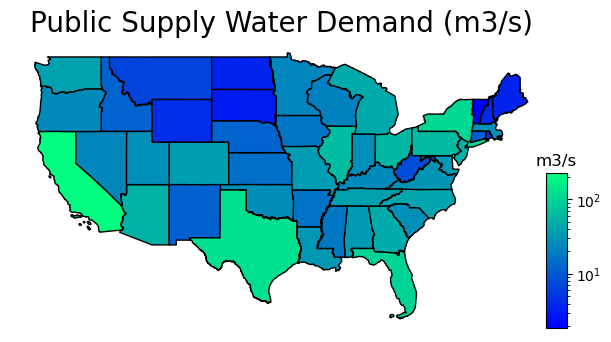

In [69]:
# Public supply demand map

# Plot USA map
cols = ['state_alpha','fresh_demand(m3/s)', 'geometry' ]
ps_state_df = pd.DataFrame(columns=cols)

state_alpha_list = []
ps_demand_list = []
geometry_list = []

for state_alpha in state_codes:
    state_alpha_list.append(state_alpha)
    ps_demand_list.append(ps_demand_by_state.loc[state_alpha]['PS-WFrTo'])
    geometry_list.append(us_states[us_states['STUSPS']==state_alpha]['geometry'].values[0])
    

ps_state_df['state_alpha'] = state_alpha_list
ps_state_df['fresh_demand(m3/s)'] = ps_demand_list
ps_state_df['geometry' ] = geometry_list
ps_state_df = ps_state_df.sort_values('state_alpha')

plot_map(ps_state_df, "Public Supply Water Demand (m3/s)", ydata = 'fresh_demand(m3/s)', scale = 'log')
# plot_bar(pp_state_df, "Power Demand (m3/s)", ydata = 'fresh_demand(m3/s)', scale = 'norm')

C:\Users\mhardika\AppData\Local\Temp\1\ipykernel_20240\1823306424.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticklabels)


47


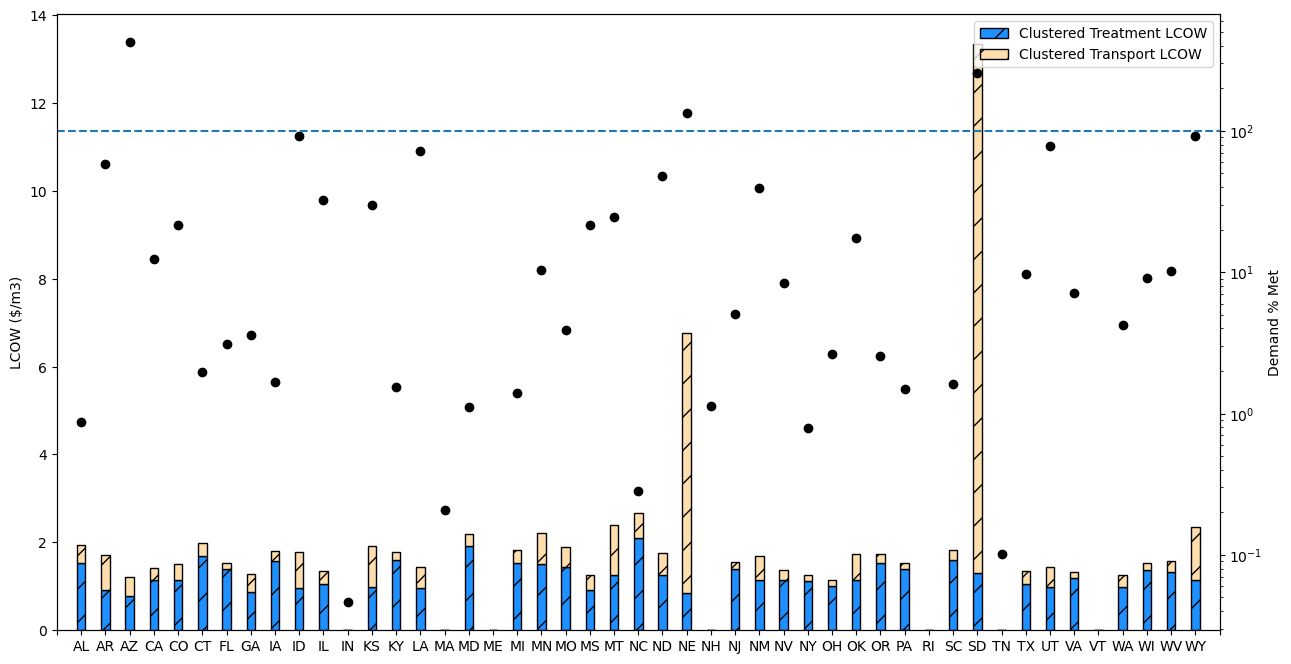

In [73]:
# Plot public supply economy of scale for unclustered and clustered combined

ps_economy_of_scale_df = pd.read_excel(r'\Users\mhardika\Documents\AMO\Analysis Data Files\Public Supply\ps_economy_of_scale_v2.xlsx')
ps_economy_of_scale_df = ps_economy_of_scale_df.fillna(0)
# pp_economy_of_scale_df.head(10)
ps_economy_of_scale_df = ps_economy_of_scale_df.sort_values('state_alpha')

fig, ax = plt.subplots(figsize=(15,8))
x = np.array(range(0,len(ps_economy_of_scale_df['state_alpha'])))
# ax.bar(x-0.35/2, ps_economy_of_scale_df['unclustered_treatment_lcow'],width = 0.35, label = 'Unclustered Treatment LCOW',color = 'blue', edgecolor='black')
# ax.bar(x-0.35/2, ps_economy_of_scale_df['unclustered_transport_lcow'], bottom = pp_economy_of_scale_df['unclustered_treatment_lcow'],width = 0.35, label = 'Unclustered Transport LCOW',color = 'darkorange', edgecolor='black')

ax.bar(x, ps_economy_of_scale_df['clustered_treatment_lcow'],width = 0.35, label = 'Clustered Treatment LCOW', color = 'dodgerblue', hatch = '/', edgecolor='black')
ax.bar(x, ps_economy_of_scale_df['clustered_transport_lcow'], bottom = ps_economy_of_scale_df['clustered_treatment_lcow'],width = 0.35, label = 'Clustered Transport LCOW', color = 'navajowhite',hatch = '/', edgecolor='black')
ax.legend(loc = 'upper right')

ticklabels = np.concatenate(([' '],ps_economy_of_scale_df['state_alpha'],[' ']))
ax.set_xticklabels(ticklabels)
ax.set_xlim([-1,47])
ax.xaxis.set_major_locator(plt.MaxNLocator(len(ps_economy_of_scale_df['state_alpha'])+1))
print(len(ps_economy_of_scale_df['state_alpha']))
# ax.set_ylim([0,6])
ax.set_ylabel('LCOW ($/m3)')

# Plot the demand fraction that can be met state wise
state_list = state_alpha_list
demand_frac_met = np.divide(common_states['well_yield'],common_states['PS-WFrTo'])

ax1 = ax.twinx()
ax1.scatter(x,demand_frac_met*100,color = 'black')
ax1.set_ylabel('Demand % Met')
ax1.axhline(100, linestyle = '--')
ax1.set_yscale('log')